In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data  = pd.read_csv('dataset/data_cleaned.csv')

In [5]:
data.describe()

,periode_data,bulan,panjang_atau_luas,tanggal,volume_sampah_perhari,panjang_atau_luas_in_m2
count,632197.000000,632197.000000,632197.000000,632197.000000,632197.000000,6.321970e+05
mean,202106.636069,6.636069,861.827580,15.781362,1.231778,3.600561e+04
std,3.429959,3.429959,1985.162941,8.829722,3.992299,2.183499e+06
min,202101.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,202104.000000,4.000000,240.000000,8.000000,0.000000,2.900000e+02
50%,202107.000000,7.000000,560.000000,16.000000,0.000000,6.000000e+02
75%,202110.000000,10.000000,1000.000000,23.000000,1.000000,1.000000e+03
max,202112.000000,12.000000,44681.000000,31.000000,1176.000000,1.836800e+08


In [6]:
data.select_dtypes(include = 'number').corr()

,periode_data,bulan,panjang_atau_luas,tanggal,volume_sampah_perhari,panjang_atau_luas_in_m2
periode_data,1.000000,1.000000,0.021285,0.015601,-0.138933,0.008055
bulan,1.000000,1.000000,0.021285,0.015601,-0.138933,0.008055
panjang_atau_luas,0.021285,0.021285,1.000000,-0.000069,-0.005288,0.103448
tanggal,0.015601,0.015601,-0.000069,1.000000,-0.000364,0.000317
volume_sampah_perhari,-0.138933,-0.138933,-0.005288,-0.000364,1.000000,-0.003008
panjang_atau_luas_in_m2,0.008055,0.008055,0.103448,0.000317,-0.003008,1.000000


In [47]:
data.select_dtypes(include='number')

,periode_data,bulan,panjang_atau_luas,tanggal,volume_sampah_perhari,panjang_atau_luas_in_m2
0,202101,1,600.0,1,12.0,600.0
1,202101,1,300.0,1,0.0,300.0
2,202101,1,400.0,1,12.0,400.0
3,202101,1,300.0,1,12.0,300.0
4,202101,1,600.0,1,12.0,600.0
...,...,...,...,...,...,...
632192,202112,12,1500.0,4,0.3,1500.0
632193,202112,12,2527.0,4,0.0,2527.0
632194,202112,12,1000.0,4,0.5,1000.0
632195,202112,12,1000.0,4,0.4,1000.0


(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

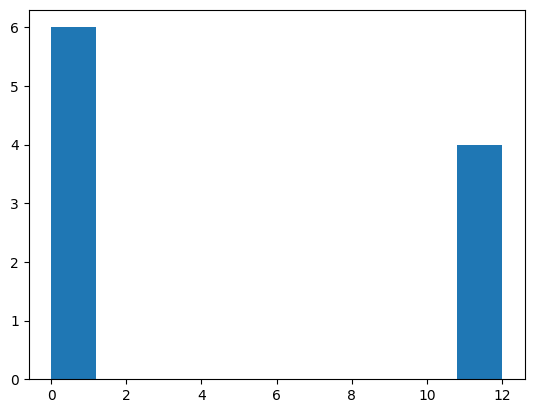

In [48]:
plt.hist(data['volume_sampah_perhari'].iloc[2:12])

1. Peta Distribusi Penampungan Sampah: Buat peta untuk memvisualisasikan distribusi titik lokasi penampungan sampah di setiap kecamatan dan wilayah.
2. Analisis Kepadatan Penampungan Sampah: Hitung kepadatan penampungan sampah per wilayah untuk mengetahui daerah dengan kepadatan tertinggi.
3. Total Volume Sampah per Tahun: Hitung total volume sampah yang ditangani per tahun.
4. Rata-Rata Volume Sampah per Hari: Hitung rata-rata volume sampah per hari di setiap titik lokasi.
5. Kapasitas Penampungan Sampah: Analisis kapasitas penampungan sampah di setiap lokasi.
6. Perubahan Volume Sampah per Tahun: Analisis perubahan volume sampah dari tahun ke tahun.
7. Pola Musiman Volume Sampah: Identifikasi pola musiman volume sampah (misalnya, volume sampah meningkat saat hari raya).
8. Hubungan antara Luas Area dan Volume Sampah: Analisis korelasi antara luas area penanganan sampah dan volume sampah.
9. Hubungan antara Jumlah Penduduk dan Volume Sampah: Analisis korelasi antara jumlah penduduk di suatu wilayah dan volume sampah.
10. Perbandingan Efisiensi Penampungan Sampah: Bandingkan efisiensi penampungan sampah di setiap kecamatan dan wilayah untuk mengetahui mana yang paling efektif.

3. Total Volume Sampah per Bulan: Hitung total volume sampah yang ditangani per bulan.

In [49]:
panjangbydate = data.groupby('bulan')['volume_sampah_perhari'].sum().reset_index()


In [50]:
panjangbydate

,bulan,volume_sampah_perhari
0,1,147604.97
1,2,77574.20
2,3,83148.76
3,4,82158.95
4,5,77901.90
5,6,77601.50
6,7,33868.00
7,8,39023.50
8,9,37993.50
9,10,41623.00


In [51]:
panjangbydate['selisih'] = None

for i in range(1, 12):  
    k = i + 1
    
    volume_bulan_i = panjangbydate[panjangbydate['bulan'] == i]['volume_sampah_perhari'].values
    volume_bulan_k = panjangbydate[panjangbydate['bulan'] == k]['volume_sampah_perhari'].values
    
    if len(volume_bulan_i) > 0 and len(volume_bulan_k) > 0:
        selisih = abs(volume_bulan_k[0] - volume_bulan_i[0])
        
        # Simpan hasil selisih di kolom 'selisih' untuk bulan k
        panjangbydate.loc[panjangbydate['bulan'] == k, 'selisih'] = selisih

panjangbydate = pd.DataFrame(panjangbydate)
panjangbydate.to_csv('dataset/selisih.csv', index=False)



In [52]:
dataselisih = pd.read_csv('dataset/selisih.csv')

In [53]:
dataselisih.describe()

,bulan,volume_sampah_perhari,selisih
count,12.000000,12.000000,11.000000
mean,6.500000,64893.873333,12479.690000
std,3.605551,33154.359040,22802.601083
min,1.000000,33868.000000,300.400000
25%,3.750000,39041.500000,1009.905000
50%,6.500000,59598.600000,3629.500000
75%,9.250000,78966.162500,5365.030000
max,12.000000,147604.970000,70030.770000


C:\Users\Hagar\AppData\Local\Temp\ipykernel_31340\238635945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=panjangbydate, x='bulan', y='volume_sampah_perhari', palette='viridis')


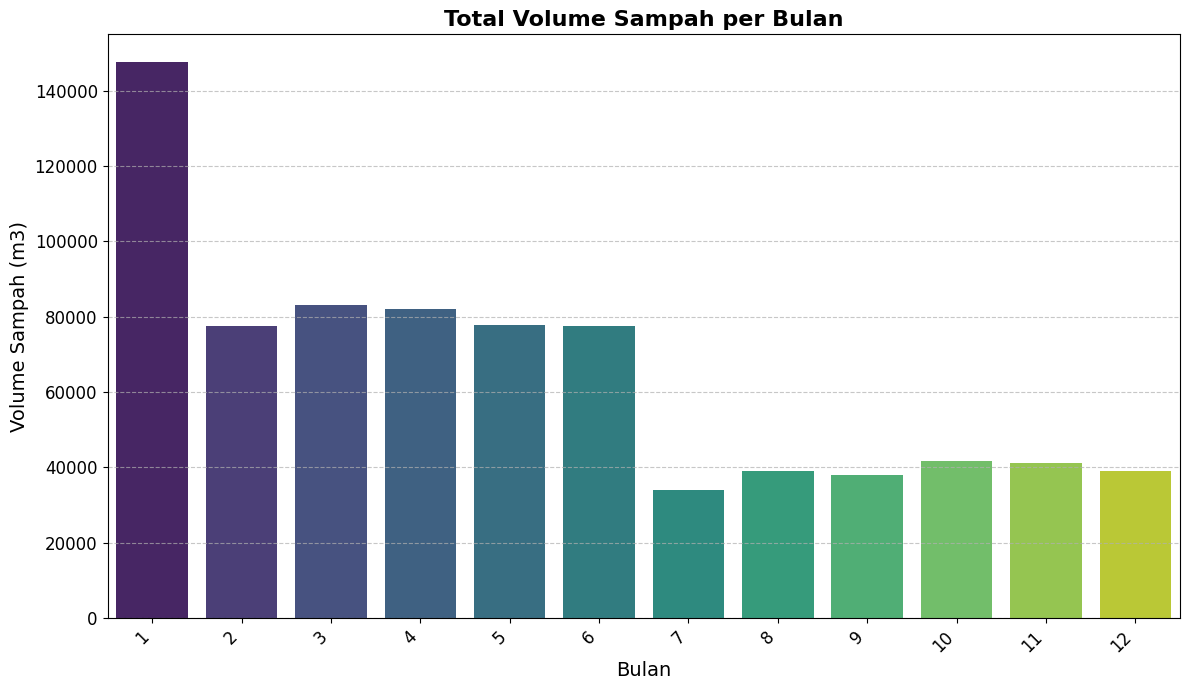

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7)) 
sns.barplot(data=panjangbydate, x='bulan', y='volume_sampah_perhari', palette='viridis')

plt.title('Total Volume Sampah per Bulan', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Volume Sampah (m3)', fontsize=14)  

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()
sa


In [55]:
panjangbydate.describe()

,bulan,volume_sampah_perhari
count,12.000000,12.000000
mean,6.500000,64893.873333
std,3.605551,33154.359040
min,1.000000,33868.000000
25%,3.750000,39041.500000
50%,6.500000,59598.600000
75%,9.250000,78966.162500
max,12.000000,147604.970000


4. Rata-Rata Volume Sampah per Hari: Hitung rata-rata volume sampah per hari di setiap titik lokasi.

In [56]:
data  = pd.read_csv('dataset/data_cleaned.csv')

In [57]:
rerata = data.groupby('kecamatan')['volume_sampah_perhari'].sum().reset_index()
rerata.sort_values(by='volume_sampah_perhari',ascending=False)

,kecamatan,volume_sampah_perhari
9,Grogol Petamburan,72974.50
37,Tamansari,57655.32
19,Kembangan,42526.32
8,Gambir,39723.50
27,Palmerah,34860.00
28,Pancoran,32559.38
14,Kebayoran Baru,25352.00
38,Tambora,24843.00
23,Mampang Prapatan,22675.60
2,Cengkareng,22084.00


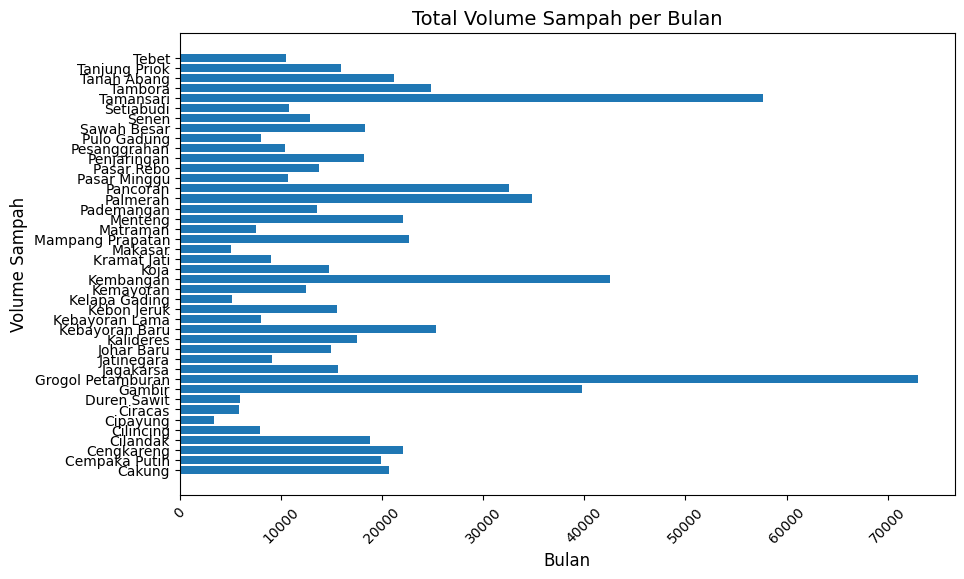

In [58]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.barh(rerata['kecamatan'],rerata['volume_sampah_perhari'])
plt.title('Total Volume Sampah per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Volume Sampah', fontsize=12)
plt.xticks(rotation=45)
plt.show()


5. Kapasitas Penampungan Sampah: Analisis kapasitas penampungan sampah di setiap lokasi.


In [59]:
data.columns

Index(['periode_data', 'bulan', 'titik_lokasi', 'kecamatan', 'wilayah',
       'panjang_atau_luas', 'satuan_panjang_luas', 'tanggal',
       'volume_sampah_perhari', 'panjang_atau_luas_in_m2'],
      dtype='object')

In [60]:
sumsampahlokasi = data.groupby('titik_lokasi')['volume_sampah_perhari'].sum().reset_index()

In [61]:
sumsampahlokasi.sort_values(by = 'volume_sampah_perhari').tail()

,titik_lokasi,volume_sampah_perhari
1866,kali / Sungai BKB Ciliwung Petamburan,3337.0
338,Kali Cengkareng Drain Jln. Raya Basmol/Tanggul,3998.0
255,Kali Baru Timur (Deta-Ciba),4426.0
12,Banjir Kanal Barat Seasons City (Jln. Inspeksi...,7423.0
63,Kali / Sungai Ciliwung Emplasement PA Manggara...,14076.0


6. Perubahan Volume Sampah per Tahun: Analisis perubahan volume sampah dari tahun ke tahun.
7. Pola Musiman Volume Sampah: Identifikasi pola musiman volume sampah (misalnya, volume sampah meningkat saat hari raya).
8. Hubungan antara Luas Area dan Volume Sampah: Analisis korelasi antara luas area penanganan sampah dan volume sampah.
9. Hubungan antara Jumlah Penduduk dan Volume Sampah: Analisis korelasi antara jumlah penduduk di suatu wilayah dan volume sampah.
10. Perbandingan Efisiensi Penampungan Sampah: Bandingkan efisiensi penampungan sampah di setiap kecamatan dan wilayah untuk mengetahui mana yang paling efektif.

6. Perubahan Volume Sampah per Bulan: Analisis perubahan volume sampah dari bulan ke bulan.

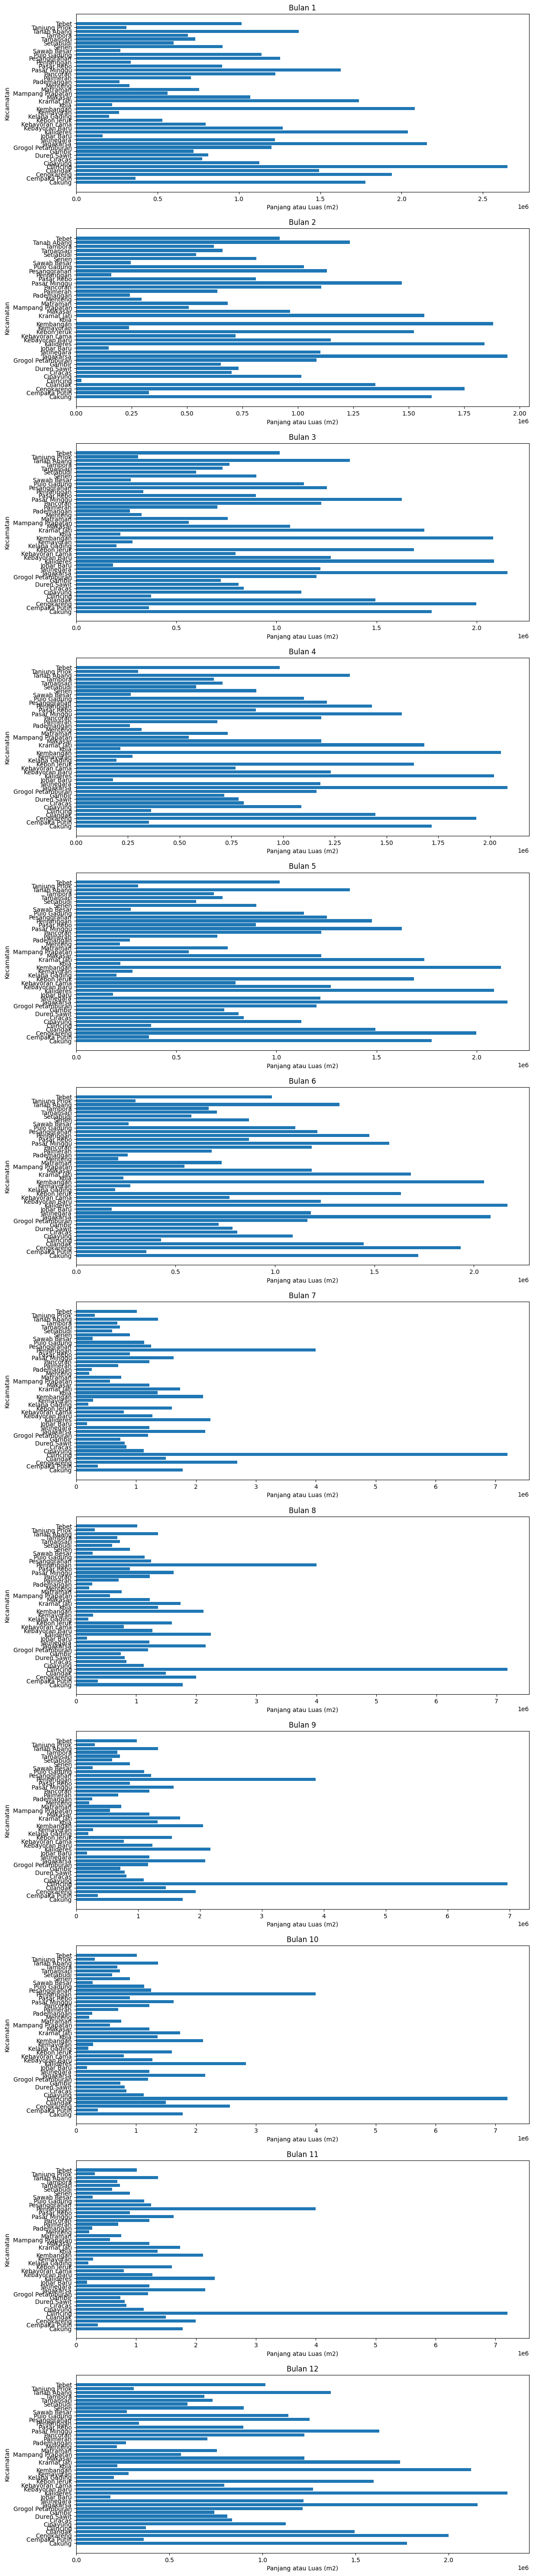

In [62]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan bulan dan kecamatan
result = data.groupby(['bulan', 'kecamatan'])['panjang_atau_luas'].sum().reset_index()

# Membuat plot
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 60))  # Membuat subplot untuk 12 bulan
fig.tight_layout(pad=4.0)

# Membuat bar plot untuk tiap bulan
for i, month in enumerate(range(1, 13)):
    # ax = axes[i // 2, i % 2]  # Akses subplot menggunakan dua indeks
    ax = axes[i]  # Akses subplot menggunakan dua indeks
    month_data = result[result['bulan'] == month]  # Filter data untuk bulan tersebut
    ax.barh(month_data['kecamatan'], month_data['panjang_atau_luas'])  # Plot bar horizontal
    ax.set_title(f'Bulan {month}')
    ax.set_xlabel('Panjang atau Luas (m2)')
    ax.set_ylabel('Kecamatan')

# Menampilkan plot
plt.show()

7. Pola Musiman Volume Sampah: Identifikasi pola musiman volume sampah (misalnya, volume sampah meningkat saat hari raya).

In [63]:
bymonth = data.groupby('bulan')['volume_sampah_perhari'].sum().reset_index()

In [64]:
bymonth

,bulan,volume_sampah_perhari
0,1,147604.97
1,2,77574.20
2,3,83148.76
3,4,82158.95
4,5,77901.90
5,6,77601.50
6,7,33868.00
7,8,39023.50
8,9,37993.50
9,10,41623.00


<Axes: xlabel='bulan', ylabel='volume_sampah_perhari'>

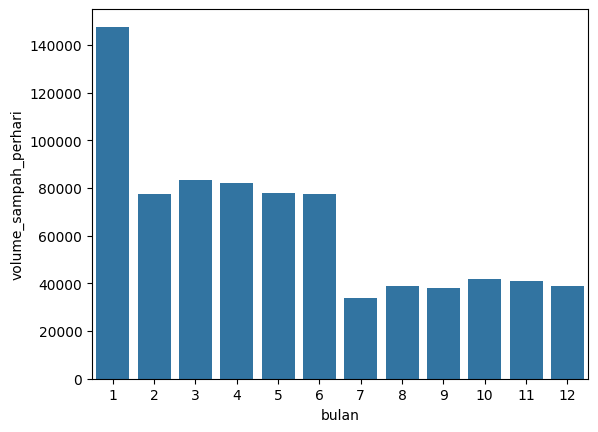

In [65]:
sns.barplot(bymonth,x='bulan',y='volume_sampah_perhari')

In [66]:
import pandas as pd

# Mengelompokkan data berdasarkan 'bulan' dan 'kecamatan', serta menghitung total volume sampah per kecamatan
VKECBUL = data.groupby(['bulan', 'kecamatan'])['volume_sampah_perhari'].sum().reset_index()

# List untuk menyimpan hasil kecamatan dengan volume sampah tertinggi tiap bulan
nilaitiapmax = []

# Looping setiap bulan untuk mencari kecamatan dengan nilai tertinggi
for i in range(1, 13):  # Asumsi data dari bulan 1 sampai bulan 12
    # Filter data berdasarkan bulan tertentu
    VKECBULdata = VKECBUL[VKECBUL['bulan'] == i]
    
    # Mencari kecamatan dengan nilai volume sampah tertinggi di bulan tersebut
    max_value = VKECBULdata.loc[VKECBULdata['volume_sampah_perhari'].idxmax()]
    
    # Menyimpan hasil ke dalam list
    nilaitiapmax.append(max_value)

# Mengonversi list hasil menjadi DataFrame
nilaitiapmax_df = pd.DataFrame(nilaitiapmax)

# Menampilkan hasil akhir
nilaitiapmax_df


,bulan,kecamatan,volume_sampah_perhari
37,1,Tamansari,18030.0
78,2,Tamansari,9216.5
91,3,Grogol Petamburan,7653.0
133,4,Grogol Petamburan,9067.0
175,5,Grogol Petamburan,8742.0
217,6,Grogol Petamburan,9143.0
259,7,Grogol Petamburan,1840.0
301,8,Grogol Petamburan,2418.5
343,9,Grogol Petamburan,2324.5
401,10,Menteng,3298.0


In [67]:
VKECBULdata = max( VKECBUL[VKECBUL['bulan'] == 1])
VKECBULdata


'volume_sampah_perhari'

In [68]:
nilaitiapmin = []

for i in range(1,13):
    VKECBULdata = VKECBUL[VKECBUL['bulan'] == i].min()
    nilaitiapmin.append(VKECBULdata)


nilaitiapmin = pd.DataFrame(nilaitiapmin)
nilaitiapmin 

,bulan,kecamatan,volume_sampah_perhari
0,1,Cakung,317.0
1,2,Cakung,12.0
2,3,Cakung,266.0
3,4,Cakung,283.0
4,5,Cakung,242.0
5,6,Cakung,204.0
6,7,Cakung,216.0
7,8,Cakung,260.0
8,9,Cakung,252.0
9,10,Cakung,242.0


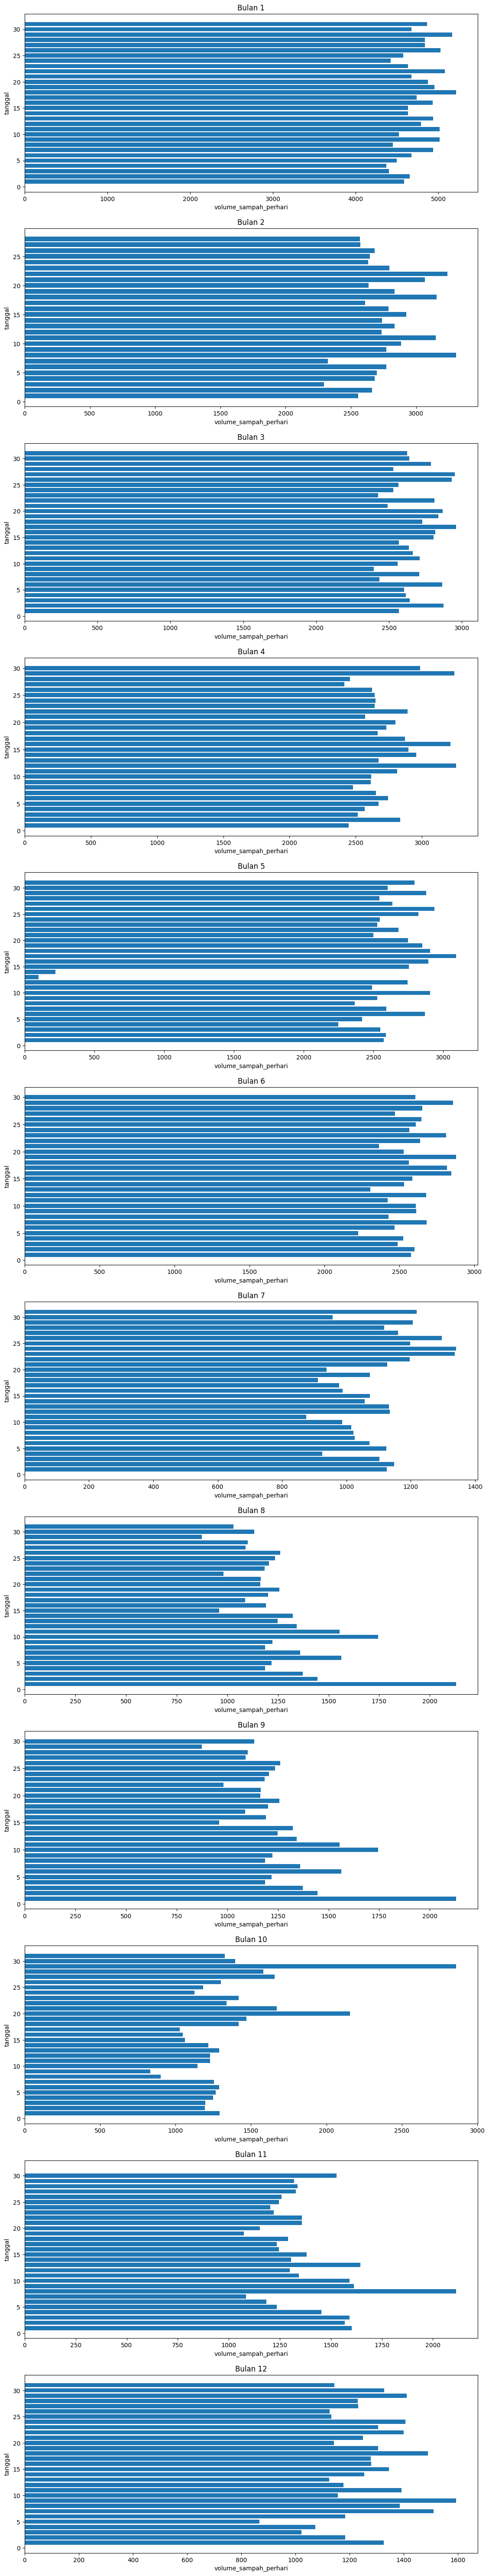

In [69]:
bytanggal = data.groupby(['bulan','tanggal'])['volume_sampah_perhari'].sum().reset_index()

# Membuat plot
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 60))  # Membuat subplot untuk 12 bulan
fig.tight_layout(pad=4.0)

# Membuat bar plot untuk tiap bulan
for i, month in enumerate(range(1, 13)):
    # ax = axes[i // 2, i % 2]  # Akses subplot menggunakan dua indeks
    ax = axes[i]  # Akses subplot menggunakan dua indeks
    month_data = bytanggal[bytanggal['bulan'] == month]  # Filter data untuk bulan tersebut
    ax.barh(month_data['tanggal'], month_data['volume_sampah_perhari'])  # Plot bar horizontal
    ax.set_title(f'Bulan {month}')
    ax.set_xlabel('volume_sampah_perhari')
    ax.set_ylabel('tanggal')

# Menampilkan plot
plt.show()

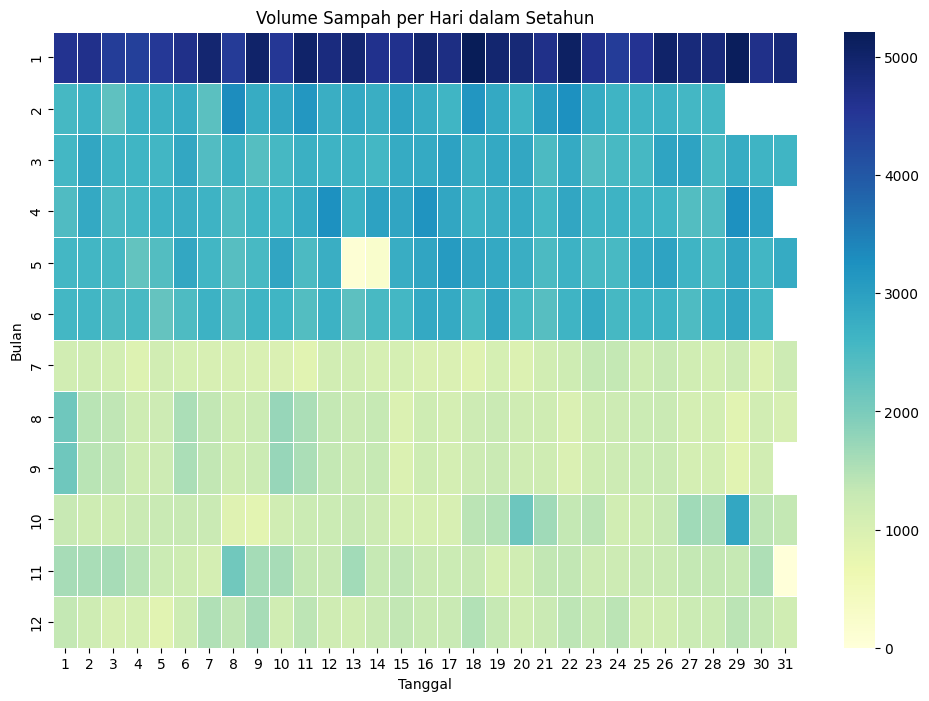

In [70]:
import seaborn as sns
import numpy as np

# Pivot data untuk membuat heatmap
heatmap_data = bytanggal.pivot(index='bulan', columns='tanggal', values='volume_sampah_perhari')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".1f", linewidths=.5)
plt.title('Volume Sampah per Hari dalam Setahun')
plt.xlabel('Tanggal')
plt.ylabel('Bulan')
plt.show()


6. Perubahan Volume Sampah per Tahun: Analisis perubahan volume sampah dari tahun ke tahun.
7. Pola Musiman Volume Sampah: Identifikasi pola musiman volume sampah (misalnya, volume sampah meningkat saat hari raya).
8. Hubungan antara Luas Area dan Volume Sampah: Analisis korelasi antara luas area penanganan sampah dan volume sampah.
9. Hubungan antara Jumlah Penduduk dan Volume Sampah: Analisis korelasi antara jumlah penduduk di suatu wilayah dan volume sampah.
10. Perbandingan Efisiensi Penampungan Sampah: Bandingkan efisiensi penampungan sampah di setiap kecamatan dan wilayah untuk mengetahui mana yang paling efektif.

8. Hubungan antara Luas Area dan Volume Sampah: Analisis korelasi antara luas area penanganan sampah dan volume sampah.


In [71]:
correlation = data['panjang_atau_luas_in_m2'].corr(data['volume_sampah_perhari'])
print(f"Korelasi: {correlation}")


Korelasi: -0.003008320874120693


9. Hubungan antara Jumlah Penduduk dan Volume Sampah: Analisis korelasi antara jumlah penduduk di suatu wilayah dan volume sampah.

In [72]:
grouped_kecamatan = data.groupby('wilayah')['kecamatan'].apply(list).reset_index()

# grouped_kecamatan[grouped_kecamatan['wilayah'] == 'Jakarta Selatan']['kecamatan']

grouped_kecamatan['wilayah'].unique()

array(['Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan',
       'Jakarta Timur', 'Jakarta Utara'], dtype=object)

jakarta column

JAKBAR

In [4]:
jabar = pd.read_csv("dataset\jakarta_data\jabar 2018-2019.csv")
jabar

,Kecamatan,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Jumlah Penduduk menurut kecamatan (Jiwa),NaN,NaN,NaN,NaN,NaN
1,NaN,Laki-laki,NaN,Perempuan,NaN,Laki-laki dan Perempuan,NaN
2,NaN,2018,2019.0,2018,2019.0,2018,2019.0
3,Kembangan,162768,165904.0,164775,168211.0,327543,334115.0
4,Kebon Jeruk,188606,190843.0,189778,192325.0,378384,383168.0
5,Palmerah,105124,105506.0,100456,100847.0,205580,206353.0
6,Grogol Petamburan,116739,117386.0,123303,124178.0,240042,241564.0
7,Tambora,125634,125853.0,115805,116036.0,241439,241889.0
8,Taman Sari,54954,54964.0,55265,55288.0,110219,110252.0
9,Cengkareng,302039,306214.0,290468,294942.0,592507,601156.0


In [114]:
jabard = jabar.loc[3:12, ['Kecamatan','Unnamed: 6']]  # Combine single index with a range
jabar = jabard.rename(columns={'Unnamed: 6': '2019'})  # Return a new DataFrame
jabar


,Kecamatan,2019
3,Kembangan,334115.0
4,Kebon Jeruk,383168.0
5,Palmerah,206353.0
6,Grogol Petamburan,241564.0
7,Tambora,241889.0
8,Taman Sari,110252.0
9,Cengkareng,601156.0
10,Kalideres,471436.0
11,Jakarta Barat,2589933.0


JAKUT

In [ ]:
jakut = pd.read_csv("dataset\jakarta_data\Jakut 2019-2022.csv")


In [121]:
jakut = jakut.rename(columns={'Unnamed: 3':'2022'})

In [122]:
jakut = jakut.loc[2:9,['Kecamatan','2022']]
jakut

,Kecamatan,2022
2,Penjaringan,314543.0
3,Pademangan,163995.0
4,Tanjung Priok,403467.0
5,Koja,337685.0
6,Kelapa Gading,137530.0
7,Cilincing,436330.0
8,Jakarta Utara,1793550.0


JAKTIM

In [131]:
jatim = pd.read_csv("dataset\jakarta_data\Jatim 2021-2022.csv")

In [132]:
jatim

,Kecamatan Jakarta Timur,Unnamed: 1,Unnamed: 2
0,NaN,Jumlah Penduduk Menurut Kecamatan di Kota Jaka...,NaN
1,NaN,2021,2022
2,Pasar Rebo,222670,225379
3,Ciracas,299399,303325
4,Cipayung,290306,295829
5,Makasar,208365,210004
6,Kramat Jati,299449,301271
7,Jatinegara,303687,306489
8,Duren Sawit,415356,417226
9,Cakung,561640,565764


In [135]:
jatim = jatim.loc[2:12].rename(columns={'Kecamatan Jakarta Timur' : 'Kecamatan','Unnamed: 2':'2021'})

In [136]:
jatim

,Kecamatan,Unnamed: 1,2021
2,Pasar Rebo,222670,225379
3,Ciracas,299399,303325
4,Cipayung,290306,295829
5,Makasar,208365,210004
6,Kramat Jati,299449,301271
7,Jatinegara,303687,306489
8,Duren Sawit,415356,417226
9,Cakung,561640,565764
10,Pulogadung,281698,282833
11,Matraman,173730,175763


In [137]:
jatim = jatim.loc[2:12,["Kecamatan","2021"]]

In [138]:
jatim

,Kecamatan,2021
2,Pasar Rebo,225379
3,Ciracas,303325
4,Cipayung,295829
5,Makasar,210004
6,Kramat Jati,301271
7,Jatinegara,306489
8,Duren Sawit,417226
9,Cakung,565764
10,Pulogadung,282833
11,Matraman,175763


Japus

In [167]:
japus = pd.read_csv("dataset\jakarta_data\Japus  2016.csv")
japus = japus.rename(columns={'Unnamed: 3':'2016'})

In [168]:
japus = japus.loc[3:16,['Kecamatan','2016']]

Jaksel

In [155]:
jaksel = pd.read_csv("jaksel 2020-2021 (1).csv")
jaksel = jaksel.rename(columns={'Unnamed: 1' : '2021'})

In [157]:
jaksel = jaksel.loc[2:12,['Kecamatan','2021']]

In [170]:
jakut

,Kecamatan,2022
2,Penjaringan,314543.0
3,Pademangan,163995.0
4,Tanjung Priok,403467.0
5,Koja,337685.0
6,Kelapa Gading,137530.0
7,Cilincing,436330.0
8,Jakarta Utara,1793550.0


jabar,jaksel,jakut,japus

In [171]:
jatim = jatim.rename(columns={'2021':'Penduduk','Kecamatan Jakarta Timur':'Kecamatan'})
jabar = jabar.rename(columns={'2019':'Penduduk','Kecamatan Jakarta Timur':'Kecamatan'})
jaksel = jaksel.rename(columns={'2021':'Penduduk','Kecamatan Jakarta Timur':'Kecamatan'})
jakut = jakut.rename(columns={'2022':'Penduduk','Kecamatan Jakarta Timur':'Kecamatan'})
japus = japus.rename(columns={'2016':'Penduduk','Kecamatan Jakarta Timur':'Kecamatan'})

In [172]:
# Menggabungkan data
df_merged = pd.concat([jatim,jabar,jaksel,jakut,japus], ignore_index=True)

# Menyimpan hasil gabungan
df_merged.to_csv('dataset\jakarta_data\jakarta.csv', index=False)

In [173]:
jakarta = pd.read_csv('dataset\jakarta_data\jakarta.csv')

In [174]:
jakarta

,Kecamatan,Penduduk
0,Pasar Rebo,225379.0
1,Ciracas,303325.0
2,Cipayung,295829.0
3,Makasar,210004.0
4,Kramat Jati,301271.0
5,Jatinegara,306489.0
6,Duren Sawit,417226.0
7,Cakung,565764.0
8,Pulogadung,282833.0
9,Matraman,175763.0


In [175]:
volkec = data.groupby('kecamatan')['volume_sampah_perhari'].sum().reset_index()

In [176]:
# Pembersihan nama kecamatan (strip spasi, ubah ke format title case)
jakarta['kecamatan'] = jakarta['Kecamatan'].str.strip().str.title()
volkec['kecamatan'] = volkec['kecamatan'].str.strip().str.title()

In [177]:
gabungan = pd.merge(jakarta, volkec, on='kecamatan', how='left')

In [178]:
pendjakarta_sampah = gabungan.loc[:,['Kecamatan','Penduduk','volume_sampah_perhari']]

In [179]:
pendjakarta_sampah['Penduduk'].corr(pendjakarta_sampah['volume_sampah_perhari'])

0.16751507314205932